In [278]:
import pandas as pd
import tensorflow as tf
import os.path
from sklearn.preprocessing import OneHotEncoder

In [279]:
# column_names = ['鄉鎮市區', '土地移轉總面積平方公尺', '移轉層次', '建物型態', '建物移轉總面積平方公尺', '房', '廳', '衛', '主建物面積', '陽台面積', '電梯']
column_names = ['district', 'rps03', 'rps09', 'rps11', 'rps15', 'rps16', 'rps17', 'rps18', 'rps28', 'rps30', 'rps31','rps22']
replace_column_names = ['district', 'land_area', 'floors', 'building_type', 'building_area', 'room', 'hall', 'bathroom', 'main_building_area', 'balcony_area', 'elevator','price_per_square_meter']


In [280]:
# Get the current directory
current_directory = os.getcwd()

# Get the parent directory
parent_directory = os.path.dirname(current_directory)
# Define the file path
data_file_path = os.path.join(parent_directory, 'data\不動產實價登錄資訊.csv')
df = pd.read_csv(data_file_path)
# filter out rps01(交易標的): 只保留有包含「房地」的
df = df[df['rps01'].str.contains('房地')]
# filter out rps11(建物型態 ): 只保留不包含「其他」的
df = df[~df['rps11'].str.contains('其他')]
# filter out rps12(主要用途): 只保留包含「住家用」的
df = df[df['rps12'].str.contains('住家用', na=False)]

# leave only rps22(單價平方公尺)
df_price = df['rps22']

df = df[column_names]

'''Remain columns before factorize'''
# # factorize district
# df['district_fac'] = pd.factorize(df['district'])[0]
# # factorize floors
# df['floors_fac'] = pd.factorize(df['rps09'])[0]
# # factorize building_type
# df['rbuilding_type_fac'] = pd.factorize(df['rps11'])[0]
# # factorize elevator
# df['elevator_fac'] = pd.factorize(df['rps31'])[0]

# # Replace column names to Engilsh
# df.columns = replace_column_names+['district_fac', 'floors_fac', 'building_type_fac', 'elevator_fac']

# # replace column names in df to ['鄉鎮市區', '土地移轉總面積平方公尺', '移轉層次', '建物型態', '建物移轉總面積平方公尺', '房', '廳', '衛', '主建物面積', '陽台面積', '電梯']
# df_data = pd.DataFrame(df, columns=replace_column_names+['district_fac','floors_fac','building_type_fac','elevator_fac'])

'''Leave only columns after factorize'''
# factorize district
df['district'] = pd.factorize(df['district'])[0]
# factorize floors
df['rps09'] = pd.factorize(df['rps09'])[0]
# factorize building_type
df['rps11'] = pd.factorize(df['rps11'])[0]
# factorize elevator
df['rps31'] = pd.factorize(df['rps31'])[0]

# Replace column names to Engilsh
df.columns = replace_column_names

# replace column names in df to ['鄉鎮市區', '土地移轉總面積平方公尺', '移轉層次', '建物型態', '建物移轉總面積平方公尺', '房', '廳', '衛', '主建物面積', '陽台面積', '電梯']
df_data = pd.DataFrame(df, columns=replace_column_names)
df_data



,district,land_area,floors,building_type,building_area,room,hall,bathroom,main_building_area,balcony_area,elevator,price_per_square_meter
0,0,3.82,0,0,29.83,1,1,1,21.74,3.41,0,119008.0
5,1,5.96,1,0,77.86,2,1,1,30.70,10.73,0,164398.0
7,2,16.94,2,0,42.58,0,0,0,32.38,3.92,0,39925.0
16,0,21.03,3,0,114.11,3,2,2,74.47,7.82,0,109543.0
17,3,31.98,4,1,149.96,3,2,2,44.48,3.28,0,120032.0
...,...,...,...,...,...,...,...,...,...,...,...,...
64183,15,8.46,28,0,57.27,1,0,1,33.04,2.94,0,166405.0
64184,1,12.84,3,0,163.82,3,2,2,78.79,8.07,0,154586.0
64185,1,19.90,11,0,237.99,3,2,3,124.42,12.69,0,155813.0
64186,1,20.81,28,0,268.68,3,2,3,124.42,12.69,0,153304.0


In [281]:
'''One hot encoding'''
# encoder = OneHotEncoder(sparse=False)

# # Fit and transform the 'district' and 'building_type' columns
# encoded_features = encoder.fit_transform(df_data[['district', 'building_type']])

# # Convert the sparse matrix to a DataFrame and set the column names
# encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['district', 'building_type']))

# # Concatenate the original DataFrame with the one-hot encoded DataFrame
# df_data = pd.concat([df_data.drop(['district', 'building_type'], axis=1), encoded_df], axis=1)
# df_data

'One hot encoding'

In [282]:
df_data.isnull().any()

district                  False
land_area                 False
floors                    False
building_type             False
building_area             False
room                      False
hall                      False
bathroom                  False
main_building_area        False
balcony_area              False
elevator                  False
price_per_square_meter    False
dtype: bool

In [283]:
'''Remove One hot encoded columns'''
# columns_to_drop = ['district', 'floors', 'building_type', 'elevator']
# columns_to_drop = [col for col in columns_to_drop if col in df_data.columns]
# df_data = df_data.drop(columns=columns_to_drop)
# df_data

'Remove One hot encoded columns'

In [284]:

corr_matrix = df_data.corr(method="pearson")
corr_matrix


,district,land_area,floors,building_type,building_area,room,hall,bathroom,main_building_area,balcony_area,elevator,price_per_square_meter
district,1.000000,0.031955,0.004255,-0.045275,0.059793,0.004645,0.027240,0.020076,0.031657,0.061582,-0.079364,-0.350085
land_area,0.031955,1.000000,0.009771,0.276789,0.371421,0.171411,0.125217,0.159179,0.513660,0.225313,0.173591,-0.054179
floors,0.004255,0.009771,1.000000,-0.081278,0.114704,-0.011579,-0.007743,0.010879,0.104601,0.004254,-0.035229,0.056646
building_type,-0.045275,0.276789,-0.081278,1.000000,-0.198261,0.241936,0.044055,0.120858,0.248767,-0.112118,0.909937,-0.183118
building_area,0.059793,0.371421,0.114704,-0.198261,1.000000,0.343191,0.289258,0.346186,0.810853,0.631193,-0.256639,-0.020453
room,0.004645,0.171411,-0.011579,0.241936,0.343191,1.000000,0.428123,0.599169,0.460955,0.256941,0.220157,-0.135529
hall,0.027240,0.125217,-0.007743,0.044055,0.289258,0.428123,1.000000,0.209947,0.295683,0.209994,0.023668,-0.045434
bathroom,0.020076,0.159179,0.010879,0.120858,0.346186,0.599169,0.209947,1.000000,0.399710,0.245868,0.077514,-0.067167
main_building_area,0.031657,0.513660,0.104601,0.248767,0.810853,0.460955,0.295683,0.399710,1.000000,0.540262,0.171891,-0.118478
balcony_area,0.061582,0.225313,0.004254,-0.112118,0.631193,0.256941,0.209994,0.245868,0.540262,1.000000,-0.168344,-0.100804


In [285]:
corr_matrix['price_per_square_meter'].sort_values(ascending=False)

price_per_square_meter    1.000000
floors                    0.056646
building_area            -0.020453
hall                     -0.045434
land_area                -0.054179
bathroom                 -0.067167
balcony_area             -0.100804
main_building_area       -0.118478
room                     -0.135529
elevator                 -0.153533
building_type            -0.183118
district                 -0.350085
Name: price_per_square_meter, dtype: float64

Saving figure Correlation_plot (Price per Square Meter)


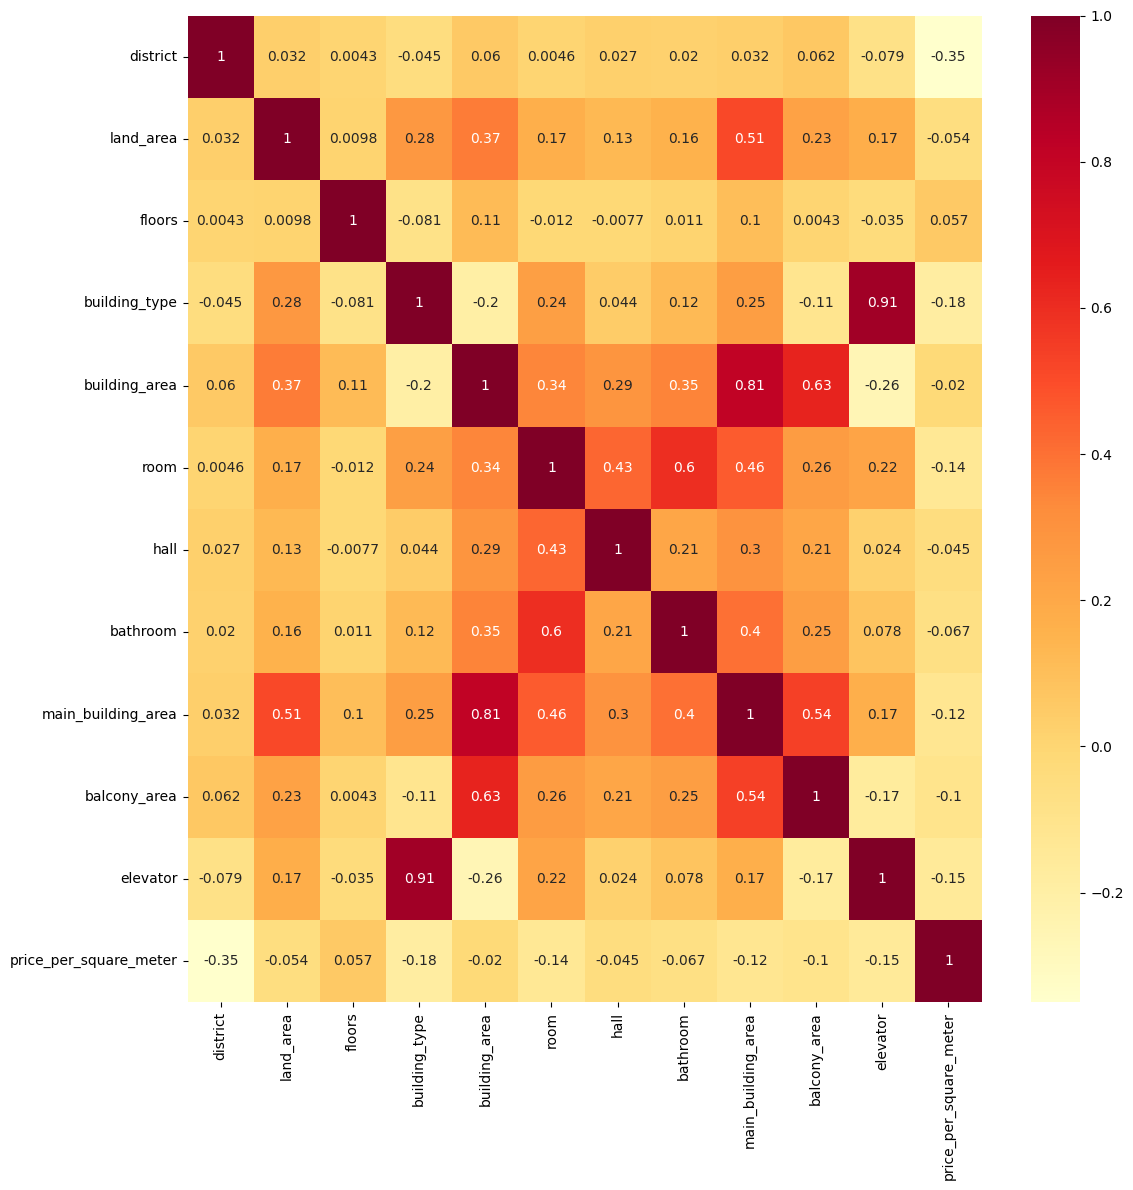

In [286]:
import seaborn as sns # 引入seaborn
import matplotlib.pyplot as plt # 引入pyplot

# Where to save the figures
PROJECT_ROOT_DIR = parent_directory
PLOT_IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Image", 'Plot')
os.makedirs(PLOT_IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(PLOT_IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

plt.figure(figsize= (len(df.columns), len(df.columns))) # 圖形大小
sns.heatmap(df_data.corr(),annot = True,cmap='YlOrRd') # 塗顏色
save_fig("Correlation_plot (Price per Square Meter)") # 儲存圖形
plt.show() # 顯示圖形

[-2814.96695691    25.10157605   112.49436707 -5860.90754877
   105.99364516 -3484.460418     970.98714401  1243.05600522
  -152.02396013  -889.88307306 -2118.92546228]
Saving figure LinearRegression_predict_vs_actual (Price per Square Meter)


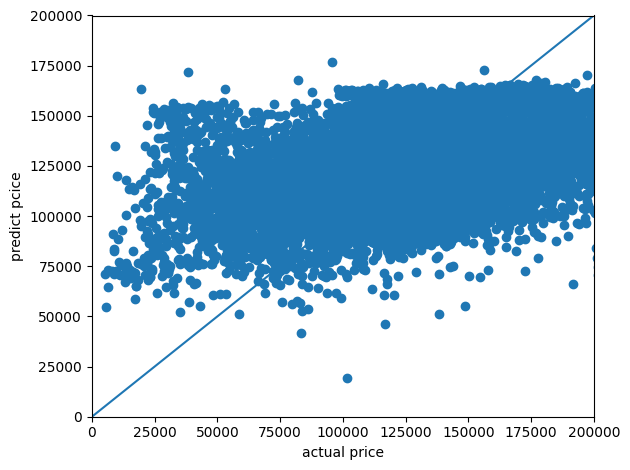

In [287]:
from sklearn.linear_model import LinearRegression # 引入LinearRegression
from sklearn.model_selection import train_test_split # 引入train_test_split
import matplotlib.pyplot as plt # 引入pyplot

x = df.drop("price_per_square_meter", axis = 1) # 13個特徵的數據
# y = df_price_normalized # 房價數據
y = df_price # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train) # 將資料拿去訓練
print(lin_reg.coef_) # 顯示係數

y_predict = lin_reg.predict(x_test) # 北test的資料用訓練出來的模型去預測

# y_test = scaler.inverse_transform(y_test)
# y_predict_inverse = scaler.inverse_transform(y_predict)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 200000) # x軸的範圍
plt.ylim(0, 200000) # y軸的範圍
plt.plot([0,200000], [0,200000]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
save_fig("LinearRegression_predict_vs_actual (Price per Square Meter)") # 儲存圖形
plt.show() # 察看結果

In [288]:
from sklearn.metrics import mean_squared_error
import numpy as np

'''Compute Model's error'''
housing_predictions = lin_reg.predict(x_test)
lin_rmse = mean_squared_error(y_test, housing_predictions,squared=False)
print('Linear regression RMSE:',lin_rmse)
mean = np.mean(np.abs(y_test - housing_predictions))
print("Linear regression MAE: {}".format(mean))

Linear regression RMSE: 42179.969045421734
Linear regression MAE: 31067.872972046443


In [289]:
import joblib

Model_Folder_path = os.path.join(parent_directory, 'Model')
Model_File_Name = 'LinearRegression (Price per Square Error).pkl'
Model_path = os.path.join(Model_Folder_path, Model_File_Name)
joblib.dump(lin_reg,Model_path)

['c:\\Users\\jgw09\\School\\NTUST_IM\\Junior_Second\\AI\\Final_Project\\housePricePredict\\Model\\LinearRegression (Price per Square Error).pkl']

In [290]:
lin_reg.score(x_train, y_train) # 訓練模型的正確率

0.1873843157600289

In [291]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
df_price_normalized = pd.DataFrame(scaler.fit_transform(df_price.to_numpy().reshape(-1, 1)))

In [292]:
df_price_normalized

,0
0,-0.091634
1,0.902611
2,-1.823907
3,-0.298960
4,-0.069203
...,...
45278,0.946574
45279,0.687685
45280,0.714561
45281,0.659603


In [293]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = df # 13個特徵的數據
y = df_price_normalized # 房價數據
# y = df_price # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比

input_dim = 11

# Create a Sequential model
model = Sequential()

# Add an input layer and a hidden layer with 32 neurons
model.add(Dense(32, input_dim=input_dim, activation='relu'))

# Add another hidden layer with 16 neurons
model.add(Dense(16, activation='relu'))

# Add an output layer with 1 neuron (for regression)
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Make predictions
y_predict = model.predict(x_test)

C:\Users\jgw09\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_48" is incompatible with the layer: expected axis -1 of input shape to have value 11, but received input with shape (None, 12)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 12), dtype=float32)
  • training=True
  • mask=None

In [ ]:
y_predict_inverse = scaler.inverse_transform(y_predict)

In [ ]:
import numpy as np
y_test_inverse = scaler.inverse_transform(y_test)
mean = np.mean(np.abs(y_test_inverse - y_predict_inverse))
mean

28730.856067554978